In [232]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from pylab import rcParams
from matplotlib import rc
sns.set()


rcParams['figure.figsize'] = 16.5, 7.5

In [233]:
df = pd.read_csv('/Users/alnoaimi/Desktop/UoB/MSc Project/Energy/Data/CleanedCT.csv', parse_dates=['ts'], index_col='ts')
df = pd.read_csv('./Data/cleandata/CleanedCT.csv', parse_dates=['ts'], index_col='ts')
df = df.drop(['Unnamed: 0'], axis=1)
df['non_working'] = df.apply(lambda x: True if \
                                         ((x['non_working'] == 'non-working'))
                                         else False, axis = 1)
print('Data Frame Shape:', df.shape)
df.head()

Data Frame Shape: (113976, 14)


,zone,demand,drybulb,dewpnt,date,year,month,hour,day_of_week,day_of_year,weekend,holiday,trend,non_working
ts,,,,,,,,,,,,,,
2004-01-01 00:00:00,CT,3126.0,33.0,26.0,2004-01-01,2004,1,0,Thu,1,False,True,7344.0,True
2004-01-01 01:00:00,CT,2945.0,34.0,26.0,2004-01-01,2004,1,1,Thu,1,False,True,7345.0,True
2004-01-01 02:00:00,CT,2804.0,40.0,26.0,2004-01-01,2004,1,2,Thu,1,False,True,7346.0,True
2004-01-01 03:00:00,CT,2729.0,38.0,23.0,2004-01-01,2004,1,3,Thu,1,False,True,7347.0,True
2004-01-01 04:00:00,CT,2722.0,37.0,21.0,2004-01-01,2004,1,4,Thu,1,False,True,7348.0,True


In [234]:
df['holiday'].value_counts()

False    110856
True       3120
Name: holiday, dtype: int64

Text(0, 0.5, 'Demand (MwH)')

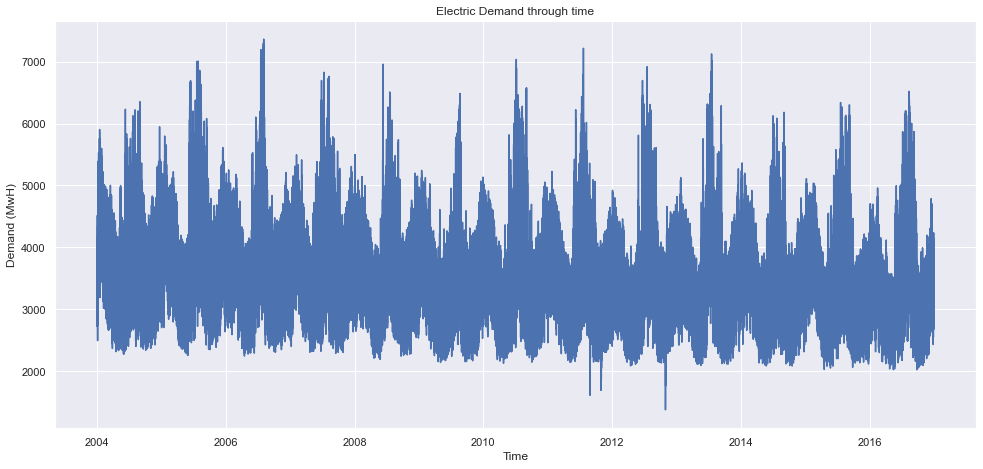

In [235]:
sns.lineplot(x=df.index, y='demand', data=df).set(title = 'Electric Demand through time')
plt.xlabel('Time')
plt.ylabel('Demand (MwH)')

Text(0.5, 0, 'Time')

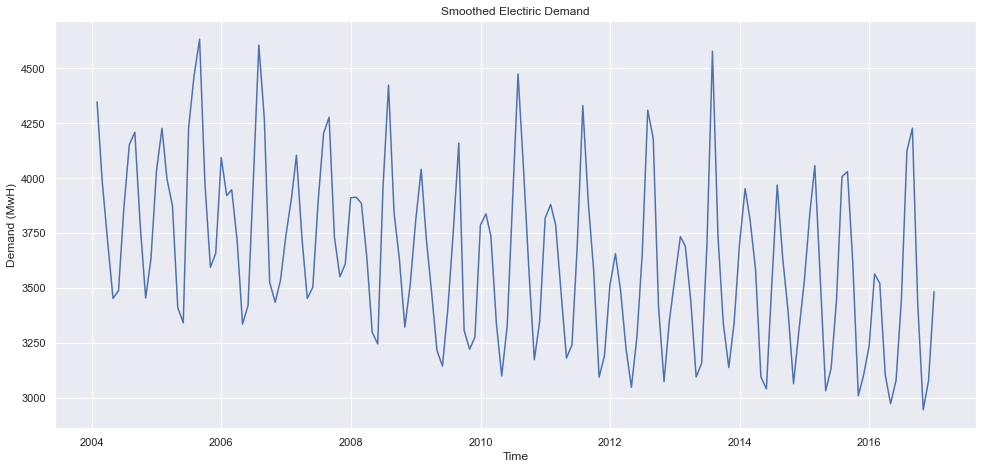

In [236]:
df_by_month = df.resample('M').mean()

sns.lineplot(x=df_by_month.index, y='demand', data=df_by_month)
plt.title('Smoothed Electiric Demand')
plt.ylabel('Demand (MwH)')
plt.xlabel('Time')

Text(0.5, 0, 'Hour of the Day')

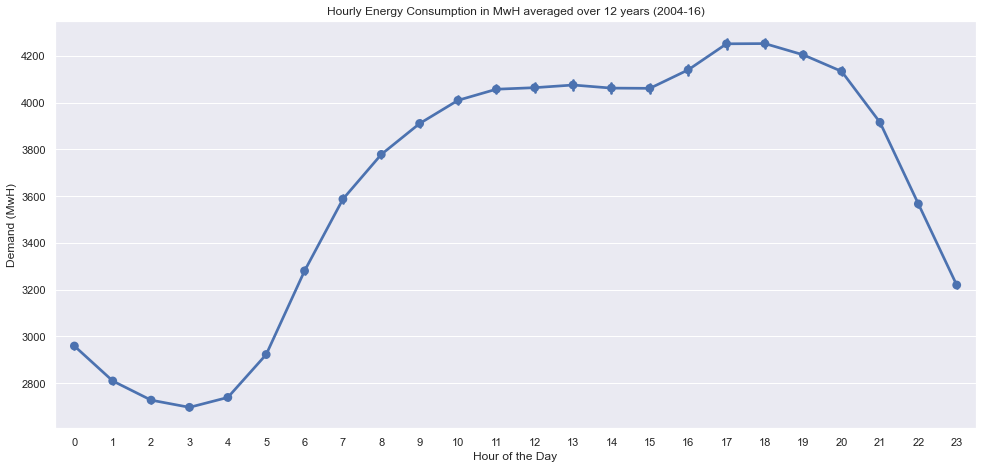

In [237]:
sns.pointplot(data=df, x='hour', y='demand')
plt.title('Hourly Energy Consumption in MwH averaged over 12 years (2004-16)')
plt.ylabel('Demand (MwH)')
plt.xlabel('Hour of the Day')

Text(0.5, 0, 'Hour of the Day')

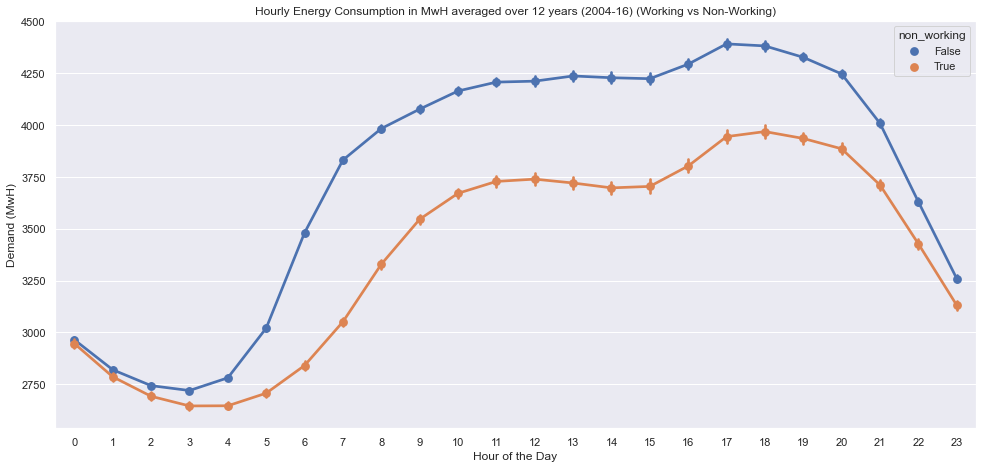

In [238]:
sns.pointplot(data=df, x='hour', y='demand', hue='non_working')
plt.title('Hourly Energy Consumption in MwH averaged over 12 years (2004-16) (Working vs Non-Working)')
plt.ylabel('Demand (MwH)')
plt.xlabel('Hour of the Day')

Text(0.5, 0, 'Month')

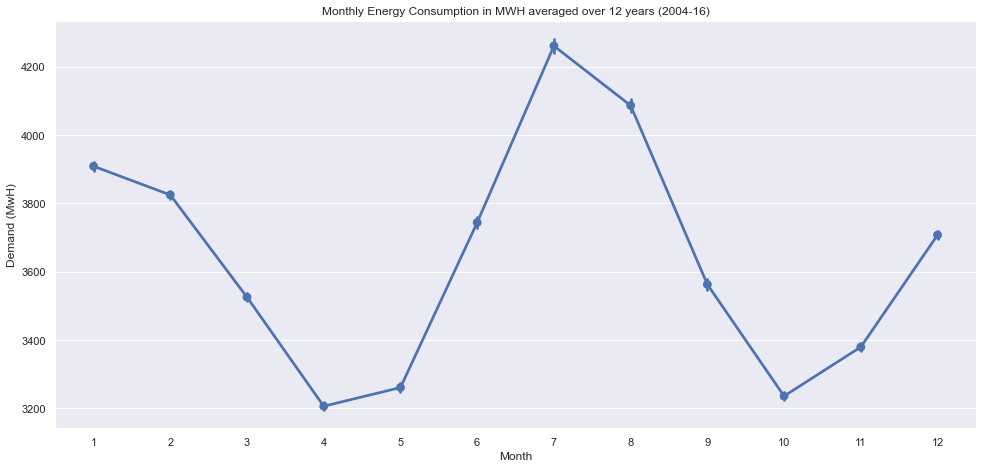

In [239]:
sns.pointplot(data=df, x='month', y='demand')
plt.title('Monthly Energy Consumption in MWH averaged over 12 years (2004-16)')
plt.ylabel('Demand (MwH)')
plt.xlabel('Month')

## Ploting the trend of monthly electric demand across the years

In [310]:
df1 = df.groupby(['month', 'year'])['demand'].mean()
df1 = pd.DataFrame(df1)
#Unstacking the above dataframe to get the data in a format we can plot
df1un = df1.unstack(level='month')
df1un.reset_index(inplace = True)
df1un.head(20)

year       demand                                                      \
month                  1            2            3            4            5   
0      2004  4345.920699  3985.614943  3707.928763  3451.777315  3487.614247   
1      2005  4225.719086  3995.870536  3873.721774  3409.881944  3340.915323   
2      2006  3919.576613  3945.989583  3711.934140  3334.771181  3419.610215   
3      2007  3907.760753  4103.083333  3726.642025  3451.898611  3501.724462   
4      2008  3911.788978  3884.808908  3635.892473  3298.179167  3244.860215   
5      2009  4039.514785  3731.836310  3477.680108  3215.388889  3144.454301   
6      2010  3836.634409  3735.123512  3337.966846  3099.081944  3327.176075   
7      2011  3879.125000  3786.312500  3473.758065  3181.066667  3240.041667   
8      2012  3655.377688  3487.594828  3221.067652  3047.848611  3275.767473   
9      2013  3732.842742  3689.555060  3437.890793  3094.644444  3156.745968   
10     2014  3951.348118  3809.586310  3581.855175  3094.952778  3040.424731   
11     2015  3840.061828  4055.900298  3539.120296  3031.747222  3135.184140   
12     2016  3563.157948  3521.190187  3103.734759  2972.748512  3079.781695   

                                                                        \
month            6            7            8            9           10   
0      3861.777778  4151.139785  4207.758065  3788.350000  3453.698253   
1      4226.905556  4465.724462  4631.258065  3975.575000  3592.997312   
2      3989.590278  4604.338710  4266.811828  3524.925000  3434.609543   
3      3890.655556  4202.720430  4276.263441  3730.845833  3550.376344   
4      3958.775000  4422.294355  3843.146505  3631.865278  3321.288978   
5      3400.983333  3755.108871  4158.227151  3306.543056  3220.665323   
6      3889.976389  4472.696237  4041.256720  3583.947222  3172.969086   
7      3695.648611  4328.869624  3887.091398  3583.605556  3093.518817   
8      3651.277778  4308.401882  4180.403226  3413.895833  3073.584677   
9      3701.973611  4576.344086  3736.147849  3338.854167  3137.498656   
10     3509.768056  3967.413978  3633.665323  3394.798611  3063.827957   
11     3442.872222  4005.783602  4028.907258  3613.194444  3009.008065   
12     3448.232622  4121.855355  4225.867333  3427.600185  2945.375267   

                                 
month           11           12  
0      3633.622222  4031.750000  
1      3657.265278  4092.233871  
2      3534.180556  3741.084677  
3      3608.483796  3910.215054  
4      3512.658333  3805.006720  
5      3275.612153  3785.255376  
6      3347.702778  3817.881720  
7      3191.154630  3512.086022  
8      3349.713426  3543.822581  
9      3340.696759  3703.260753  
10     3303.055556  3533.966398  
11     3103.413889  3234.697581  
12     3078.101137  3482.089270

In [311]:
melt = pd.melt(df1un, id_vars='year', value_name='Avg. monthly energy consumption MWH')
melt.head()

,year,NaN,month,Avg. monthly energy consumption MWH
0,2004,demand,1,4345.920699
1,2005,demand,1,4225.719086
2,2006,demand,1,3919.576613
3,2007,demand,1,3907.760753
4,2008,demand,1,3911.788978


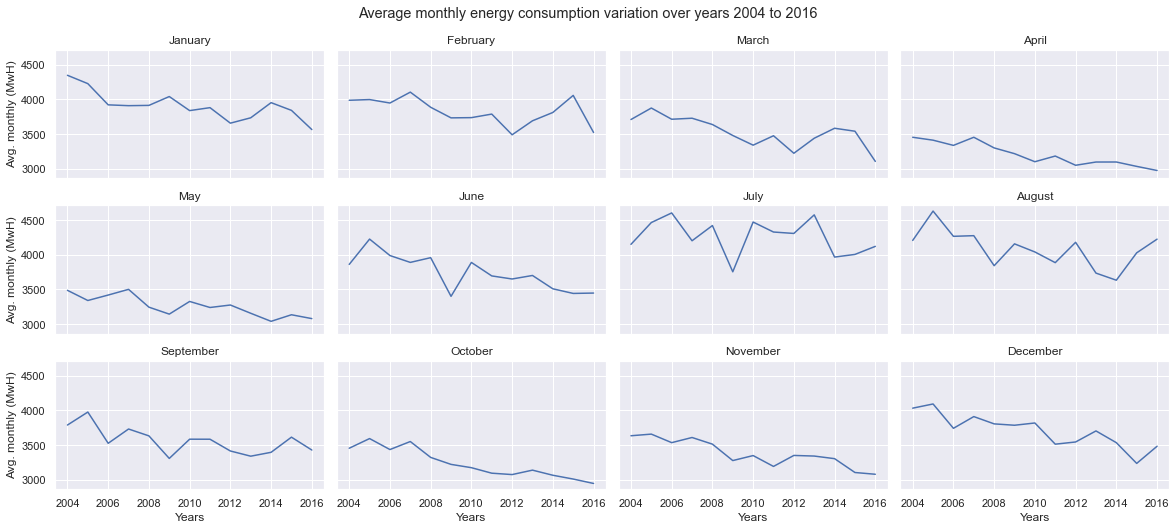

In [314]:
fig, axes = plt.subplots(3, 4, sharex=True, sharey=True, figsize=(16.5, 7.5))
fig.suptitle('Average monthly energy consumption variation over years 2004 to 2016')
axes[0, 0].set_ylabel('Avg. monthly (MwH)')
axes[1, 0].set_ylabel('Avg. monthly (MwH)')
axes[2, 0].set_ylabel('Avg. monthly (MwH)')

# Jan
jan = melt[melt['month'] == 1]
sns.lineplot(ax=axes[0, 0], x=jan.year.values, y=jan['Avg. monthly energy consumption MWH'])
axes[0, 0].set_title('January')

# Jan
feb = melt[melt['month'] == 2]
sns.lineplot(ax=axes[0, 1], x=jan.year.values, y=feb['Avg. monthly energy consumption MWH'])
axes[0, 1].set_title('February')

# mar
mar = melt[melt['month'] == 3]
sns.lineplot(ax=axes[0, 2], x=jan.year.values, y=mar['Avg. monthly energy consumption MWH'])
axes[0, 2].set_title('March')

# apr
apr = melt[melt['month'] == 4]
sns.lineplot(ax=axes[0, 3], x=jan.year.values, y=apr['Avg. monthly energy consumption MWH'])
axes[0, 3].set_title('April')

# may
may = melt[melt['month'] == 5]
sns.lineplot(ax=axes[1, 0], x=jan.year.values, y=may['Avg. monthly energy consumption MWH'])
axes[1, 0].set_title('May')

# jun
jun = melt[melt['month'] == 6]
sns.lineplot(ax=axes[1, 1], x=jan.year.values, y=jun['Avg. monthly energy consumption MWH'])
axes[1, 1].set_title('June')

# jul
jul = melt[melt['month'] == 7]
sns.lineplot(ax=axes[1, 2], x=jan.year.values, y=jul['Avg. monthly energy consumption MWH'])
axes[1, 2].set_title('July')

# aug
aug = melt[melt['month'] == 8]
sns.lineplot(ax=axes[1, 3], x=jan.year.values, y=aug['Avg. monthly energy consumption MWH'])
axes[1, 3].set_title('August')

# sep
sep = melt[melt['month'] == 9]
sns.lineplot(ax=axes[2, 0], x=jan.year.values, y=sep['Avg. monthly energy consumption MWH'])
axes[2, 0].set_title('September')
axes[2, 0].set_xlabel('Years')

# oct
oct = melt[melt['month'] == 10]
sns.lineplot(ax=axes[2, 1], x=jan.year.values, y=oct['Avg. monthly energy consumption MWH'])
axes[2, 1].set_title('October')
axes[2, 1].set_xlabel('Years')

# nov
nov = melt[melt['month'] == 11]
sns.lineplot(ax=axes[2, 2], x=jan.year.values, y=nov['Avg. monthly energy consumption MWH'])
axes[2, 2].set_title('November')
axes[2, 2].set_xlabel('Years')

# dec
dec = melt[melt['month'] == 12]
sns.lineplot(ax=axes[2, 3], x=jan.year.values, y=dec['Avg. monthly energy consumption MWH'])
axes[2, 3].set_title('December')
axes[2, 3].set_xlabel('Years')

fig.tight_layout()


A downward trend can be observed in the data, but it is different for different months.

In [243]:
#Using pivot table to create a dataframe having index as hours and columns as weekdays and each cell will contain the average
#energy consumption for that particular hour of the weekday

hour_weekday = df.pivot_table(values='demand', index='hour', columns = 'day_of_week', aggfunc = 'mean')
cols = ['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun']
hour_weekday = hour_weekday[cols]
hour_weekday

day_of_week,Mon,Tue,Wed,Thu,Fri,Sat,Sun
hour,,,,,,,
0,2864.129838,2974.022816,2997.904538,2991.735716,2989.135831,2984.483315,2908.370029
1,2734.333914,2829.048366,2849.514137,2841.841303,2838.769237,2820.257919,2749.658259
2,2669.528614,2752.538934,2769.300121,2760.920049,2757.057265,2725.168152,2654.657872
3,2654.567847,2727.930600,2743.662906,2734.812962,2729.056175,2677.989663,2605.930354
4,2724.054656,2789.494923,2802.108534,2791.574286,2783.869978,2681.353069,2597.823727
5,2959.268314,3030.685230,3040.965906,3027.451695,3008.656982,2753.651262,2634.718261
6,3398.258462,3494.646235,3503.342861,3481.275090,3442.156655,2910.318730,2728.931547
7,3743.286659,3845.564295,3851.134935,3824.589570,3784.946835,3150.478583,2907.710945
8,3914.900795,3993.350844,3996.254802,3972.067847,3949.858884,3442.516458,3176.380263


Text(125.0, 0.5, 'Hour of the day')

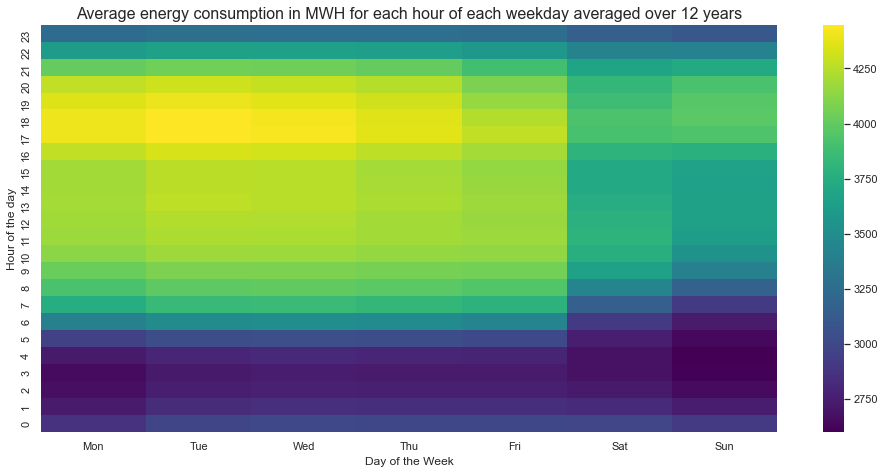

In [244]:
sns.heatmap(hour_weekday.sort_index(ascending = False), cmap='viridis')
plt.title('Average energy consumption in MWH for each hour of each weekday averaged over 12 years', fontsize=16)
plt.xlabel('Day of the Week')
plt.ylabel('Hour of the day')

Text(0.5, 0, 'Day of the Week')

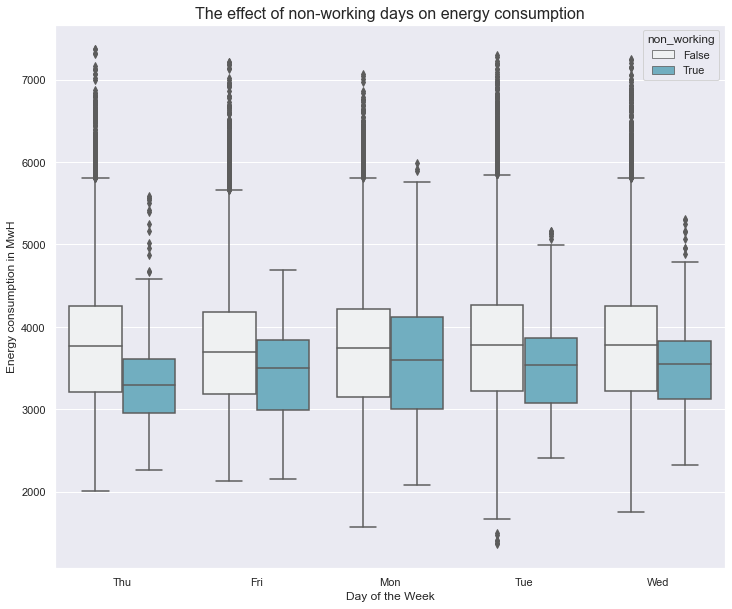

In [248]:
tempdf = df.copy()
days = ['Mon', 'Tue', 'Wed', 'Thu', 'Fri']
tempdf = tempdf.loc[tempdf['day_of_week'].isin(days)]
plt.figure(figsize=(12,10))
sns.boxplot(data=tempdf, x='day_of_week', y='demand', hue='non_working', color='c')
plt.title('The effect of non-working days on energy consumption', fontsize=16)
plt.ylabel('Energy consumption in MwH', fontsize=12)
plt.xlabel('Day of the Week', fontsize=12)


Text(0.5, 0, 'Energy consumption in MwH')

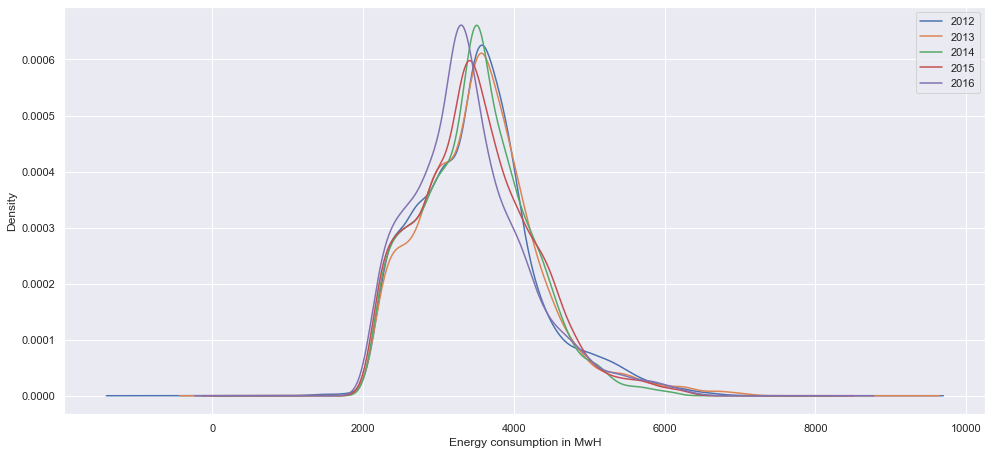

In [256]:
tempdf = df.copy()
years = [2012, 2013, 2014, 2015, 2016]
tempdf = tempdf.loc[tempdf['year'].isin(years)]

for year in tempdf['year'].unique():
    tempdf[tempdf['year'] == year]['demand'].plot(kind='density', legend = True, label=year)
plt.xlabel('Energy consumption in MwH')

In [274]:
def season(month):
    if month in [3, 4, 5]:
        return 'Spring'
    elif month in [6, 7, 8]:
        return 'Summer'
    elif month in [9, 10, 11]:
        return 'Fall'
    else:
        return 'Winter'

tempdf = df.copy()
tempdf['season'] = tempdf.month.apply(season)

/Users/alnoaimi/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 1.0, 'Temperuature VS Energy Consumption')

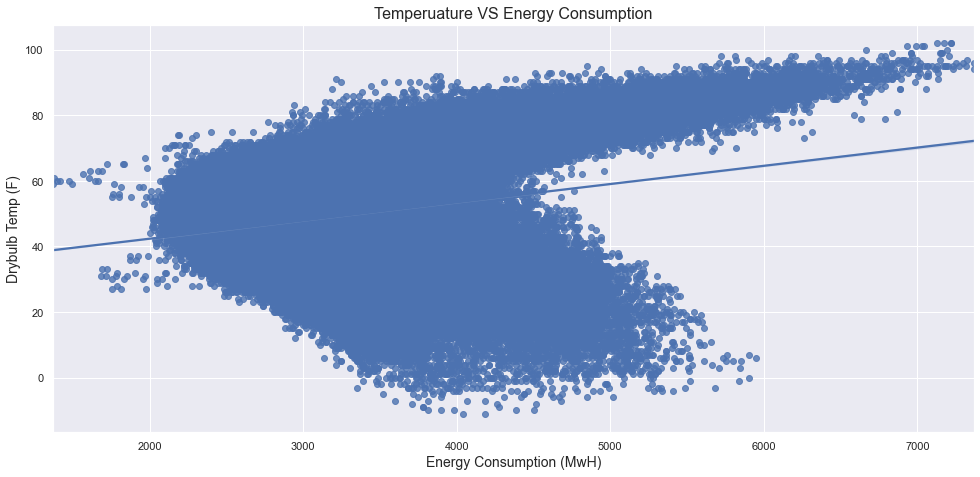

In [277]:
sns.regplot('demand', 'drybulb', data=tempdf)
plt.xlabel('Energy Consumption (MwH)', fontsize=14)
plt.ylabel('Drybulb Temp (F)', fontsize=14)
plt.title('Temperuature VS Energy Consumption', fontsize=16)

/Users/alnoaimi/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/Users/alnoaimi/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/Users/alnoaimi/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpreta

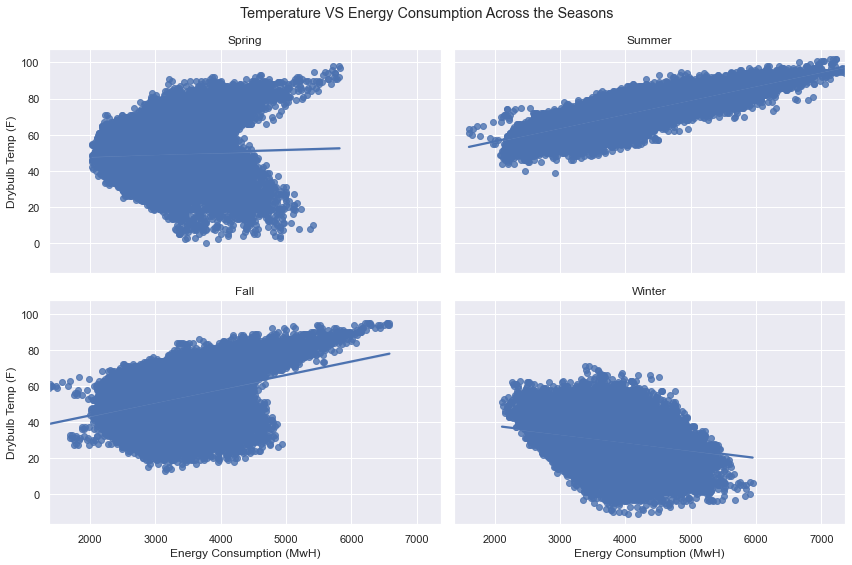

In [308]:
fig, axes = plt.subplots(2, 2, sharex=True, sharey=True, figsize=(12, 8))
fig.suptitle('Temperature VS Energy Consumption Across the Seasons')
# axes[0, 0].set_ylabel('Drybulb Temp (F)')
# axes[1, 0].set_ylabel('Drybulb Temp (F)')

# Spring
sns.regplot('demand', 'drybulb', data=tempdf[tempdf['season'] == 'Spring'], ax=axes[0, 0])
axes[0, 0].set_title('Spring')
axes[0, 0].set_ylabel('Drybulb Temp (F)')
axes[0, 0].set(xlabel=None)

# Summer
sns.regplot('demand', 'drybulb', data=tempdf[tempdf['season'] == 'Summer'], ax=axes[0, 1])
axes[0, 1].set_title('Summer')
axes[0, 1].set(xlabel=None, ylabel=None)

# Fall
sns.regplot('demand', 'drybulb', data=tempdf[tempdf['season'] == 'Fall'], ax=axes[1, 0])
axes[1, 0].set_title('Fall')
axes[1, 0].set_ylabel('Drybulb Temp (F)')
axes[1, 0].set_xlabel('Energy Consumption (MwH)')

# Winter
sns.regplot('demand', 'drybulb', data=tempdf[tempdf['season'] == 'Winter'], ax=axes[1, 1])
axes[1, 1].set_title('Winter')
axes[1, 1].set_xlabel('Energy Consumption (MwH)')
axes[1, 1].set(ylabel=None)

# Setting subplot parameters
fig.tight_layout()


Text(0.5, 1.0, 'Energy Consumption & Temperature')

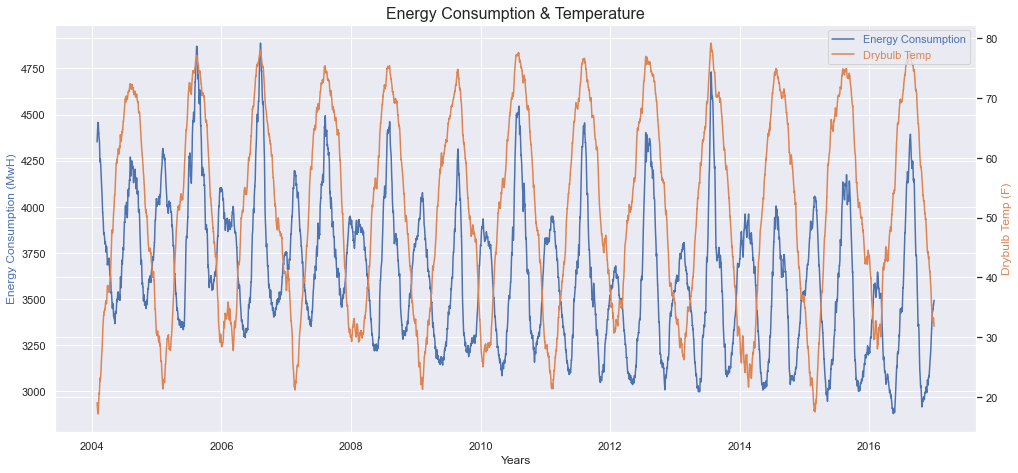

In [340]:
from mpl_toolkits.axes_grid1 import host_subplot
import matplotlib.pyplot as plt

host = host_subplot(111)
par = host.twinx()
host.set_xlabel('Years')
host.set_ylabel('Energy Consumption (MwH)')
par.set_ylabel('Drybulb Temp (F)')

p1, = host.plot(df['demand'].rolling(rolling_num).mean(), label='Energy Consumption')
p2, = par.plot(df['drybulb'].rolling(rolling_num).mean(), label='Drybulb Temp')

leg = plt.legend()

host.yaxis.get_label().set_color(p1.get_color())
leg.texts[0].set_color(p1.get_color())

par.yaxis.get_label().set_color(p2.get_color())
leg.texts[1].set_color(p2.get_color())

plt.title('Energy Consumption & Temperature', fontsize=16)
# fig.suptitle('Temperature VS Energy Consumption Across the Seasons')
